### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Data Preprocessing

In [1]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [2]:
data = data[data != ' ?']

In [3]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [4]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [5]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [6]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [7]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [8]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [9]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# set Salary as the target value.
y = data['Salary']
X = data.drop(['Salary'], axis = 1)
# scale data
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Question 1
First train the following models on X_train and y_train. 
- Linear support vector machine with default parameters. 
- decision tree with ``max_depth = 3``
- K neighbors classifier with ``n_neighbors = 5``.

In the all above models, set ``random_sate = 0``.
Compute the test precision score of hard-voting classifier? (two significant digits)

In [11]:

from sklearn.ensemble import VotingClassifier


from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [23]:
linear_svm__fit = LinearSVC().fit(X_train, y_train)
dtree_fit = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_fit.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)



# log_clf = LogisticRegression()
# log_clf.fit(X_train, y_train)
# knn_clf = KNeighborsClassifier(7)
# knn_clf.fit(X_train, y_train)
# svm_clf = SVC(C = 10, probability = True)
# svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lsvm', linear_svm__fit), ('dtree', dtree_fit), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
# print ('Hard vote accuracy =', voting_clf.score(X_train, y_train))
# print ('Hard vote accuracy =', voting_clf.score(X_test, y_test))

# from sklearn.metrics import accuracy_score
# for clf in (linear_svm__fit, dtree_fit, knn_clf, voting_clf):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
y_pred = voting_clf.predict(X_test)

In [26]:

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Confusion matrix:
[[5810  349]
 [ 902 1080]]


In [27]:
1080/(1080+349)
#0.76

0.7557732680195941

#### Question 2
First train the following models on X_train and y_train. 
- Support vector machine with kernel 'rbf' and default parameters. 
- Decision tree with ``max_depth = 3``
- Logistic regression with default parameters.

In the all above models, set ``random_sate = 0``.
Compute the test recall score of soft-voting classifier? (two significant digits)

In [15]:
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(kernel='rbf',probability=True)),
    ('dt_clf', DecisionTreeClassifier(max_depth=3, random_state=0))
], voting='soft')

In [16]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.84191131310649803

In [19]:
y_pred = voting_clf.predict(X_test)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Confusion matrix:
[[5802  357]
 [ 930 1052]]


In [20]:
#recall
1052/(1052+930)
#0.53

0.5307769929364279

#### Question 3
Train a bagging classifier on base model logistic regression with default parameters. Set the hyper-parameter as follow: 
```Python
n_estimators = 100
max_samples = 500
max_features = 5
random_state = 0```
What is out of bag score? (two significant digits)

In [30]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression()

bag_clf = BaggingClassifier(log_clf, n_estimators=100, max_samples=500,max_features=5, bootstrap=True, oob_score=True,random_state=0)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_
#0.76

0.76199836199836202

#### Question 4
Use a grid search to find the best parameters of a random forest machine learning model on this dataset. 
```Python 
max_depth in [1, 3, 5, 7]
max_features in [5, 7, 9]
n_estimators in [100, 200, 500]
random_state = 0
cv = 5```

What are the best parameters of the model? 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:

from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(random_state=0)
param_grid = { 
    'n_estimators'=100,
    'max_features': [5, 7, 9],
    'max_depth' : [1, 3, 5, 7]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
#7.9.100



{'max_depth': 7, 'max_features': 9, 'n_estimators': 500}

#### Question 5
Train a random forest machine learning model on this dataset using the best parameters in the previous question. 

Which feature has the highest importance? 

In [29]:
forest = RandomForestClassifier(n_estimators=100,max_features=9,max_depth=7, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
forest.feature_importances_



array([  4.67025098e-02,   6.20710426e-03,   1.86909172e-01,
         4.13033442e-03,   2.42092029e-01,   5.23021145e-02,
         4.04079489e-02,   8.62563983e-04,   1.80227202e-04,
         2.23993831e-01,   1.01422020e-04,   1.97466290e-02,
         4.25388353e-04,   1.47546869e-04,   1.41577162e-01,
         1.08747872e-03,   5.31091396e-04,   6.84338114e-03,
         1.17165109e-03,   2.26512148e-02,   2.46943727e-04,
         3.74301851e-04,   4.60913243e-04,   2.34257295e-04,
         6.12783279e-04])

In [35]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

<IPython.core.display.Javascript object>


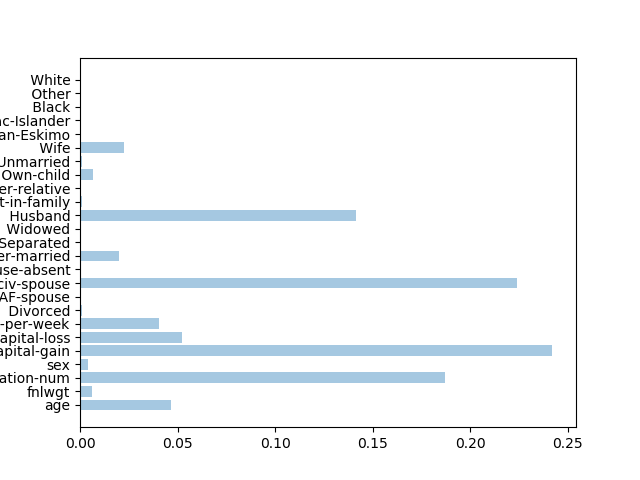

([<matplotlib.axis.YTick at 0x110b4d748>,
 <a list of 25 Text yticklabel objects>)

In [37]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
#capital gain